In [2]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# makeing seperate data set for traiining and testing
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(r"C:\Users\DELL\Desktop\forest_fire\Training and Validation",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory(r"C:\Users\DELL\Desktop\forest_fire\Testing",
                                        target_size=(150,150),
                                        batch_size = 32,
                                        class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [5]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [6]:
# model building
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))


In [10]:
# compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
# model fitting
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

ValueError: Calling `Model.fit` in graph mode is not supported when the `Model` instance was constructed with eager mode enabled. Please construct your `Model` instance in graph mode or call `Model.fit` with eager mode enabled.

In [9]:
# predicting dataset
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 0s 71ms/step


In [10]:
predictions

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [11]:
print(len(predictions))

68


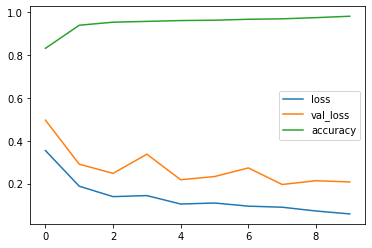

In [12]:
# plotting loss as per iterartion
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

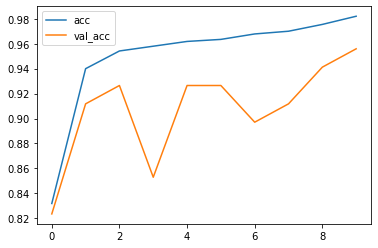

In [13]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [14]:
# Making a function to see any image from dataset with predicted label
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("Forest is not on fire and safe ",fontsize=30)
    elif val == 0:
        plt.xlabel("Forest is on fire",fontsize=30)

1/1 [==============================] - 0s 203ms/step
[[0.]]


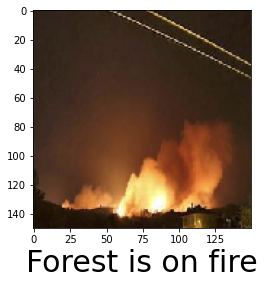

In [15]:
predictImage(r"D:\forest_fire\Testing\fire\abc190.jpg")

1/1 [==============================] - 0s 80ms/step
[[0.]]


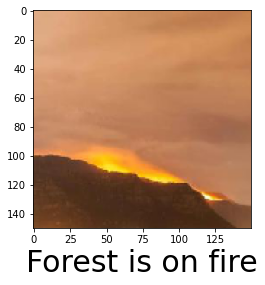

In [19]:
predictImage(r"C:\Users\DELL\Desktop\forest_fire\Testing\fire\abc185.jpg")

1/1 [==============================] - 0s 46ms/step
[[1.]]


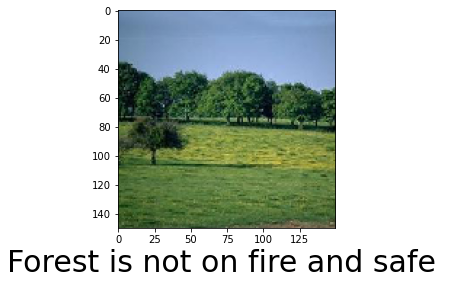

In [53]:
predictImage(r"D:\forest_fire\Testing\nofire\abc340.jpg")

1/1 [==============================] - 0s 37ms/step
[[1.]]


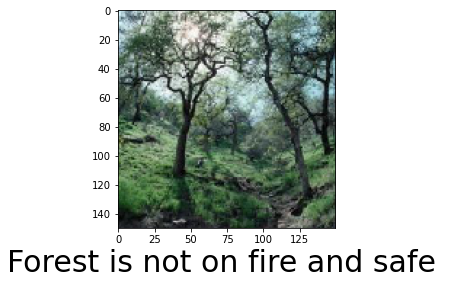

In [21]:
predictImage(r"C:\Users\DELL\Desktop\forest_fire\Training and Validation\nofire\abc199.jpg")

In [ ]:
]+
# Model is well performing in testing.
# The model can be improved further more as the graphs showing accuracy and loss are bit messy.
# Transfer Learning can be used to reduce the learning/training time significantly.